In [1]:
import sys
import numpy as np
import pandas as pd
sys.path.append('../../lib/')
import matplotlib.pyplot as plt
from frustration_graph import *
from frustration_traditional import * 

In [2]:
from dwave.system import DWaveSampler, EmbeddingComposite
import dimod
import dwave.inspector

## Wall CPU

In [3]:
L = 20
N = 100
ratios = np.linspace(0, 1, N)
Ts = np.linspace(0.1, 3.5, N)
err = 10

try:
    res = pd.read_csv(f"../../Results/Ising_Frustrated/Classical/res_wall_{N}x{N}_{err}err.gzip", compression='gzip')
except:
    res = transition(L, Ts, ratios, err_runs=err, workers=12)
    #res.to_csv(f"../../Results/Ising_Frustrated/Classical/res_wall_{N}x{N}_{err}err.gzip", compression='gzip')

In [11]:
res = transition(L, [0.8], ratios, err_runs=err, workers=12)

<AxesSubplot: xlabel='ratio'>

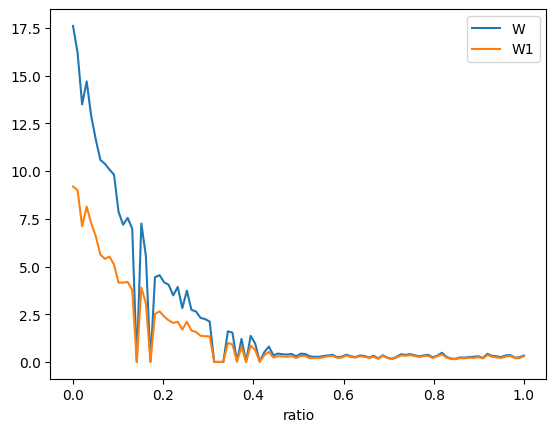

In [12]:
res.plot("ratio", ["W", "W1"])

## Wall QPU

In [1]:
L = 20
ratio = 0.4
num_reads = 20
bqm = bqm_frustration(L, ratio, 0)

qpu = DWaveSampler()
sampler = EmbeddingComposite(qpu)

sampleset = sampler.sample(bqm, num_reads=num_reads, annealing_time=900,
                            label=f'Ising Frustrated Wall')

NameError: name 'bqm_frustration' is not defined

In [4]:
prova = np.reshape(list(sampleset.first.sample.values()), (L, L))

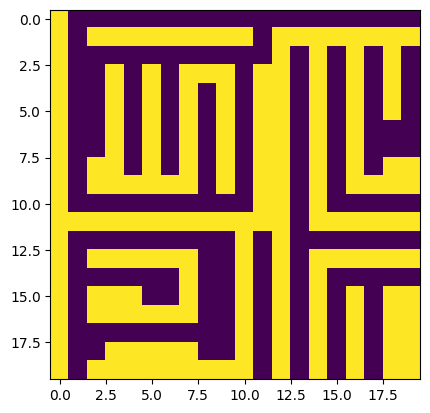

In [ ]:
plt.imshow(prova)

In [5]:
wall(prova)

70